In [1]:
# załadowanie bibliotek

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import pandas as pd

In [2]:
# załadowanie danych
import os 

path = r"E:\studiaMGR\SEMESTR III\EiWD\2\IHME_GDP_1960_2050_CSV_1\IHME_GDP_1960_2050_Y2021M09D22.CSV"
folder = r"E:\studiaMGR\SEMESTR III\EiWD\2\wykresy"

data = pd.read_csv(path, low_memory=False)
data.head()

,location_id,location_name,iso3,level,year,gdp_ppp_mean,gdp_ppp_lower,gdp_ppp_upper,gdp_usd_mean,gdp_usd_lower,gdp_usd_upper
0,1,Global,G,Global,1960,1.748345e+13,1.601915e+13,1.911586e+13,1.296863e+13,1.266890e+13,1.334177e+13
1,1,Global,G,Global,1961,1.813537e+13,1.659537e+13,1.982493e+13,1.346097e+13,1.314767e+13,1.383021e+13
2,1,Global,G,Global,1962,1.895328e+13,1.739039e+13,2.061477e+13,1.406576e+13,1.376060e+13,1.443746e+13
3,1,Global,G,Global,1963,1.965662e+13,1.811706e+13,2.134993e+13,1.461831e+13,1.432132e+13,1.497693e+13
4,1,Global,G,Global,1964,2.100575e+13,1.935664e+13,2.276791e+13,1.552986e+13,1.523498e+13,1.587998e+13


In [3]:
num_data = data.select_dtypes(include='number')

num_data.describe()

,location_id,year,gdp_ppp_mean,gdp_ppp_lower,gdp_ppp_upper,gdp_usd_mean,gdp_usd_lower,gdp_usd_upper
count,19838.000000,19838.000000,1.983800e+04,1.983800e+04,1.983800e+04,1.983800e+04,1.983800e+04,1.983800e+04
mean,949.871560,2005.000000,1.334543e+12,1.235788e+12,1.444079e+12,8.554096e+11,8.197528e+11,8.967612e+11
std,5965.433243,26.268513,9.148287e+12,8.610030e+12,9.789327e+12,6.286364e+12,6.041288e+12,6.585419e+12
min,1.000000,1960.000000,1.448063e+02,6.299026e+01,2.621094e+02,1.174979e+02,8.318772e+01,1.270468e+02
25%,63.000000,1982.000000,3.678736e+03,2.639116e+03,4.829886e+03,1.624411e+03,1.395430e+03,1.828575e+03
50%,125.500000,2005.000000,1.103640e+04,8.105541e+03,1.346178e+04,4.863298e+03,4.279291e+03,5.465731e+03
75%,183.000000,2028.000000,2.949281e+04,2.308992e+04,3.562660e+04,1.997525e+04,1.795003e+04,2.223434e+04
max,44578.000000,2050.000000,1.827414e+14,1.667007e+14,2.025062e+14,1.119468e+14,1.017185e+14,1.239708e+14


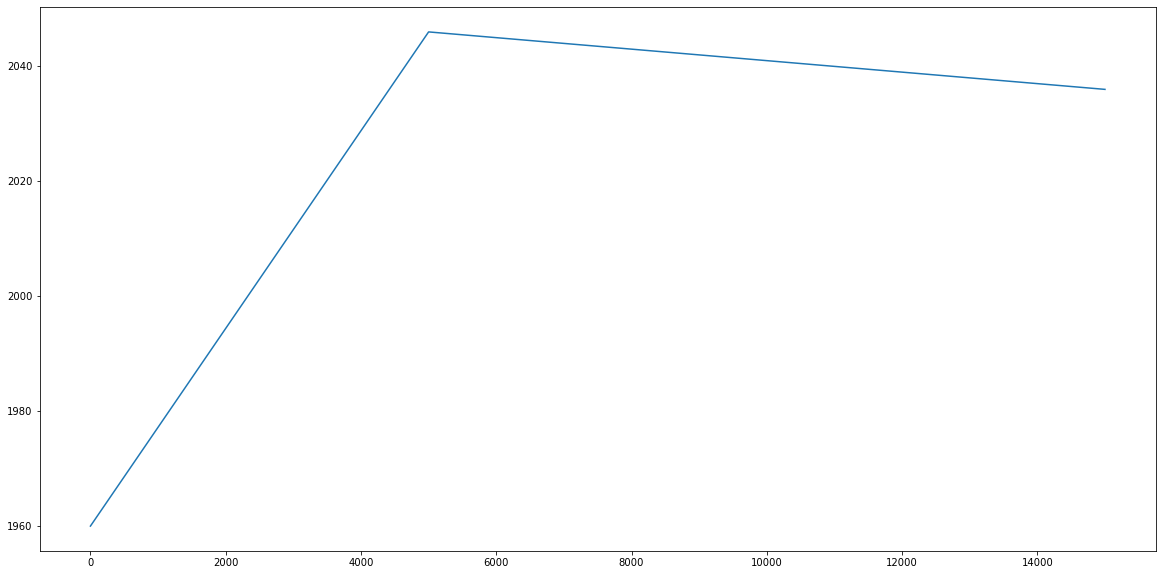

In [4]:
# wykres liniowy

years = data['year'][::5_000]

plt.rcParams["figure.figsize"] = (20,10)
plt.plot(years)
plt.savefig(os.path.join(folder, 'wykres1.svg'), dpi=400, bbox_inches='tight')

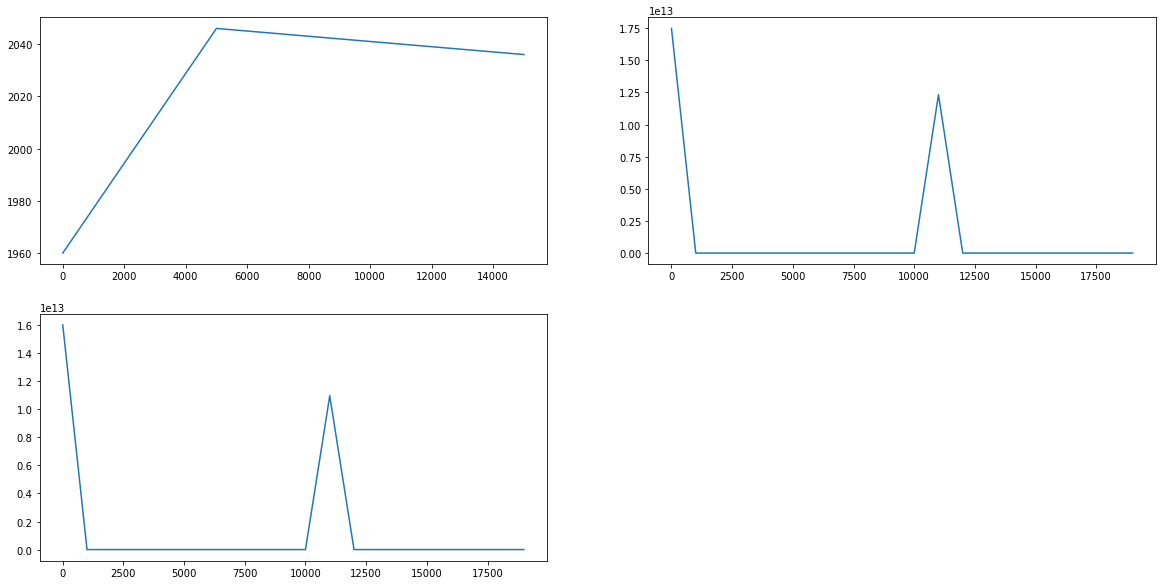

In [5]:
# kilka podwykresów

fig = plt.figure()
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)

gdp_ppp_mean = data['gdp_ppp_mean'][::1_000]
gdp_ppp_lower = data['gdp_ppp_lower'][::1_000]

ax0.plot(years)
ax1.plot(gdp_ppp_mean)
ax2.plot(gdp_ppp_lower)

plt.savefig(os.path.join(folder, 'wykres2.svg'), dpi=400, bbox_inches='tight')

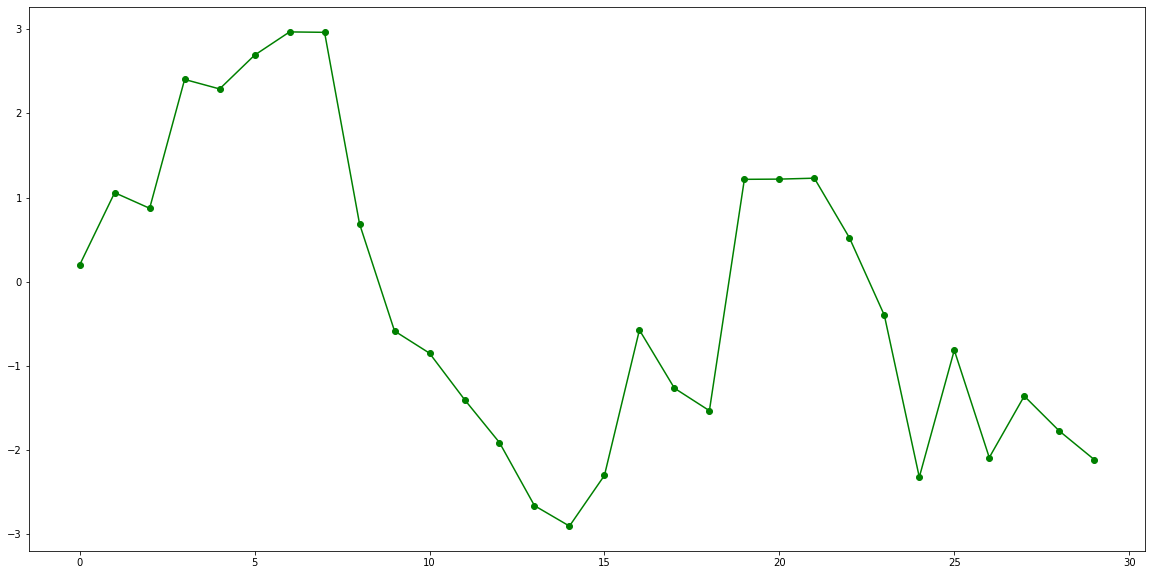

In [6]:
# wykres punktowy ze zdefiniowanymi kolorami, stylem znaczników i linii

from numpy.random import randn
plt.plot(randn(30).cumsum(), 'go-')
plt.savefig(os.path.join(folder, 'wykres3.svg'), dpi=400, bbox_inches='tight')

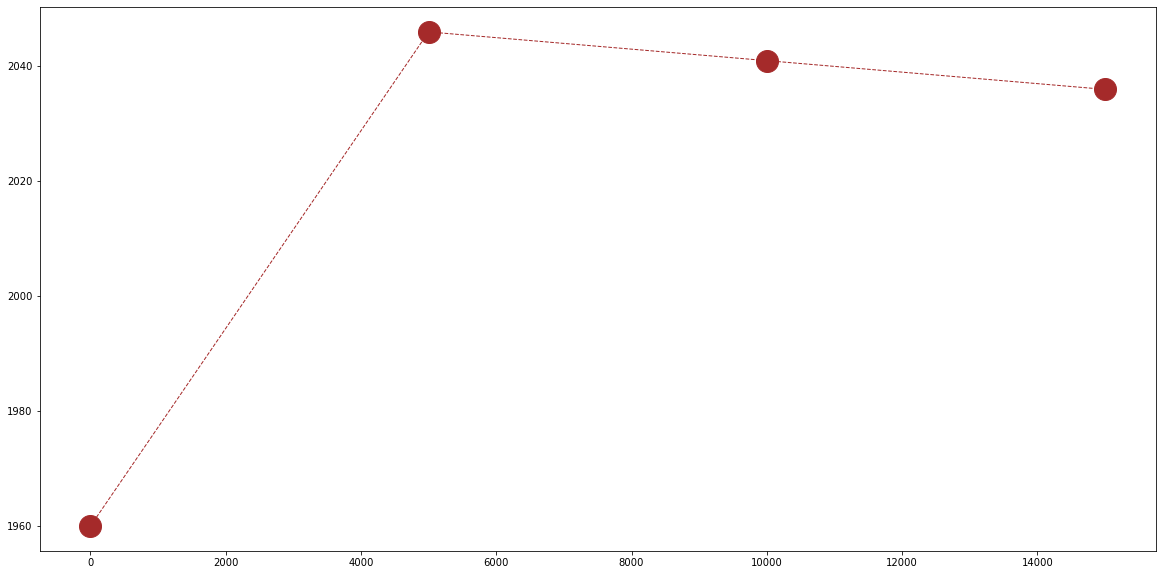

In [8]:
plt.plot(years, color='brown', marker='o', markersize=22, linestyle='--', linewidth=1)
plt.savefig(os.path.join(folder, 'wykres4.svg'), dpi=400, bbox_inches='tight')

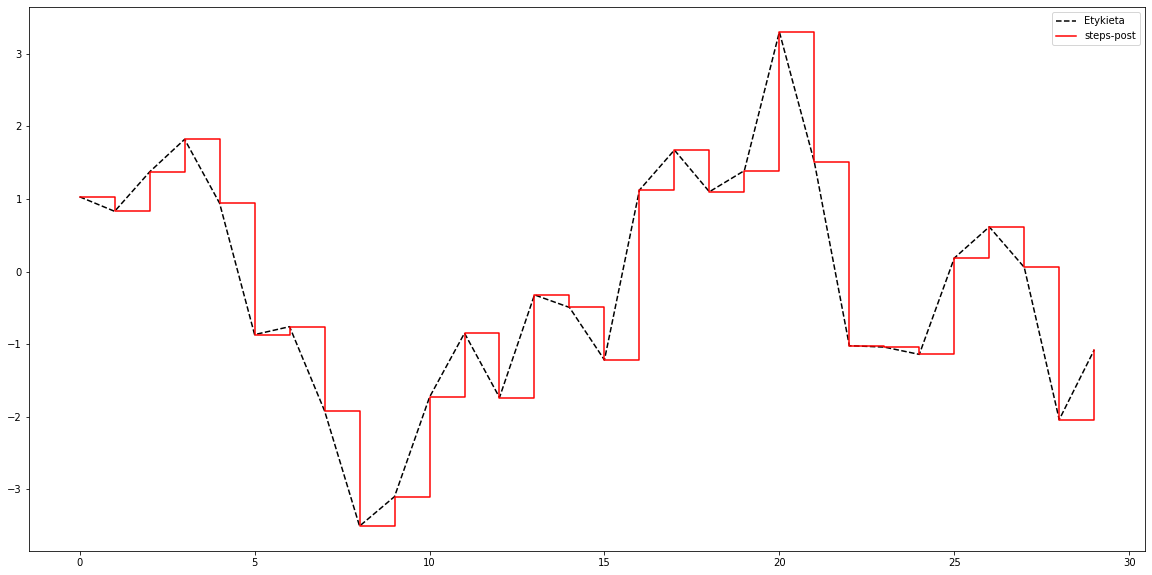

In [9]:
# wykres interpolacji liniowej

data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Etykieta')
plt.plot(data, 'r-',  label="steps-post", drawstyle="steps-post")
plt.legend(loc='best')

# normalizacja
# years_normal = years.div(years.sum())
# elim_ch_normal = elim_ch.div(elim_ch.sum())
# prelim_est_normal = prelim_est.div(prelim_est.sum())

# plt.plot(years_normal, 'k--', label='years', drawstyle='steps-pre')
# plt.plot(elim_ch_normal, 'g.', label='elim ch', drawstyle='steps-mid')
# plt.plot(prelim_est_normal, 'r-', label='elim ch', drawstyle='steps-post')
# plt.legend(loc='best')

plt.savefig(os.path.join(folder, 'wykres5.png'), dpi=400, bbox_inches='tight')

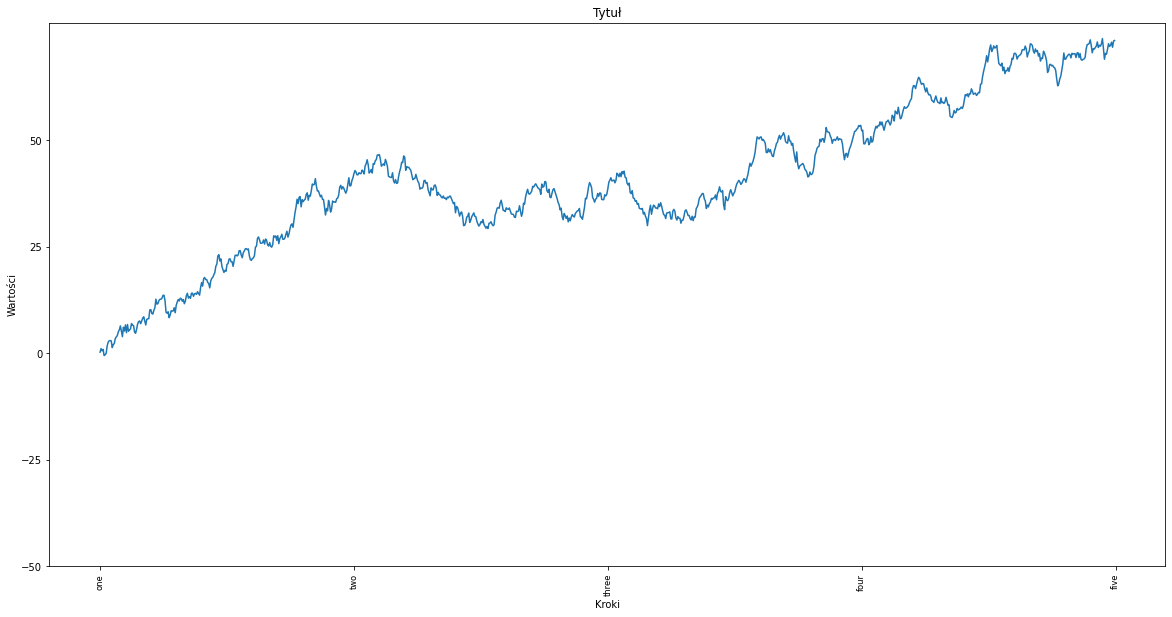

In [12]:
# dodanie etykiet na osi

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

ax.set_xticks([0, 250, 500, 750, 1000])
ax.set_yticks([-50, -25, 0, 25, 50])

ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=90, fontsize='small')

# dodanie właściwości wykresu słownikiem

props = {
    'title': "Tytuł",
    'xlabel': "Kroki",
    'ylabel': "Wartości"
}
ax.set(**props)

plt.savefig(os.path.join(folder, 'wykres6.svg'), dpi=400, bbox_inches='tight')

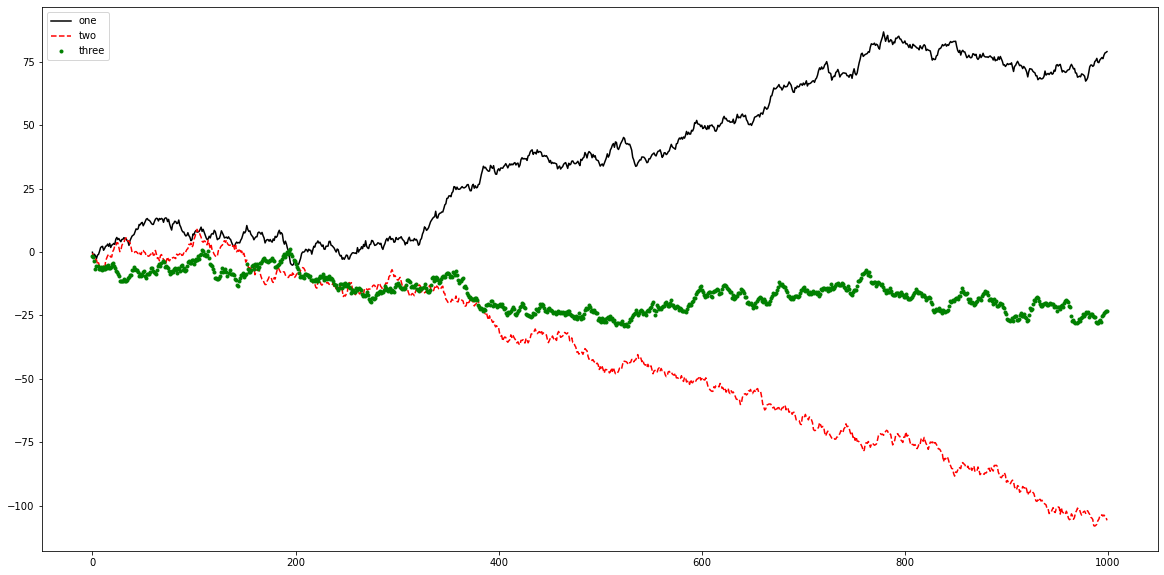

In [13]:
fig = plt.figure(); 
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'r--', label='two')
ax.plot(randn(1000).cumsum(), 'g.', label='three')
ax.legend(loc='best')

plt.savefig(os.path.join(folder, 'wykres7.svg'), dpi=400, bbox_inches='tight')

In [15]:
# zapis wykresu do pliku

path = r"E:\studiaMGR\SEMESTR III\EiWD\2\wykresywykres01.svg"
plt.savefig(path, dpi=400, bbox_inches='tight')

<Figure size 1440x720 with 0 Axes>

In [16]:
x = np.arange(0, 300_00*50_000, 50_000)

print(len(x))

print(x)

30000
[         0      50000     100000 ... 1499850000 1499900000 1499950000]


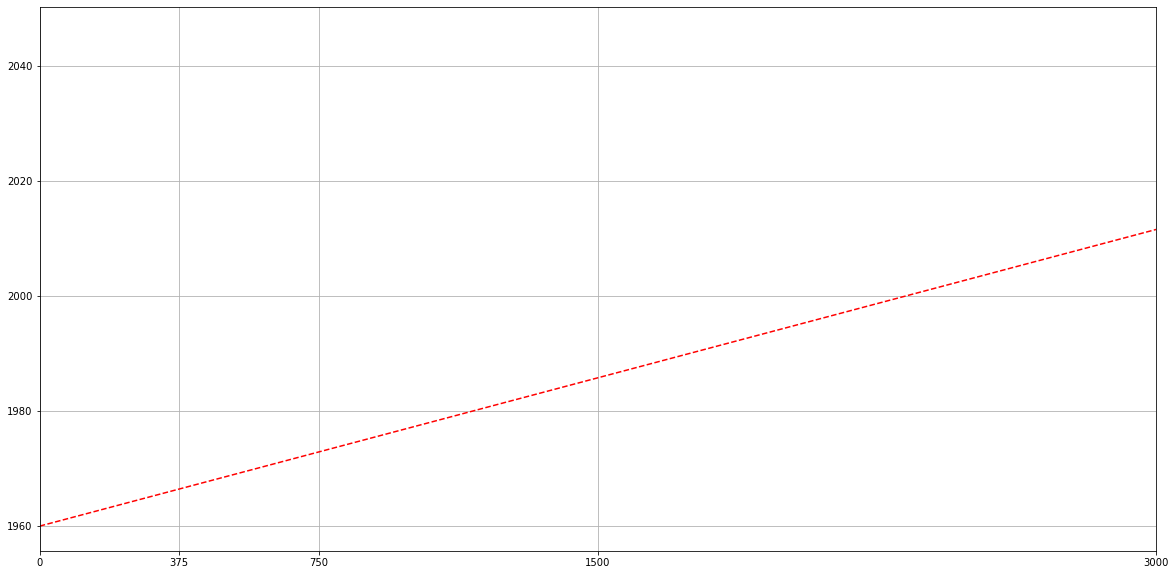

In [21]:
import numpy as np
import pandas as pd

xmax = 3_000

s = pd.Series(years, index=np.arange(0, xmax*5_000, 5_000))
s.plot(kind='line', logy=False, xticks=[0, xmax/8, xmax/4, xmax/2, xmax], xlim=[0, xmax], grid=True, style='r--')

plt.savefig(os.path.join(folder, 'wykres8.svg'), dpi=400, bbox_inches='tight')

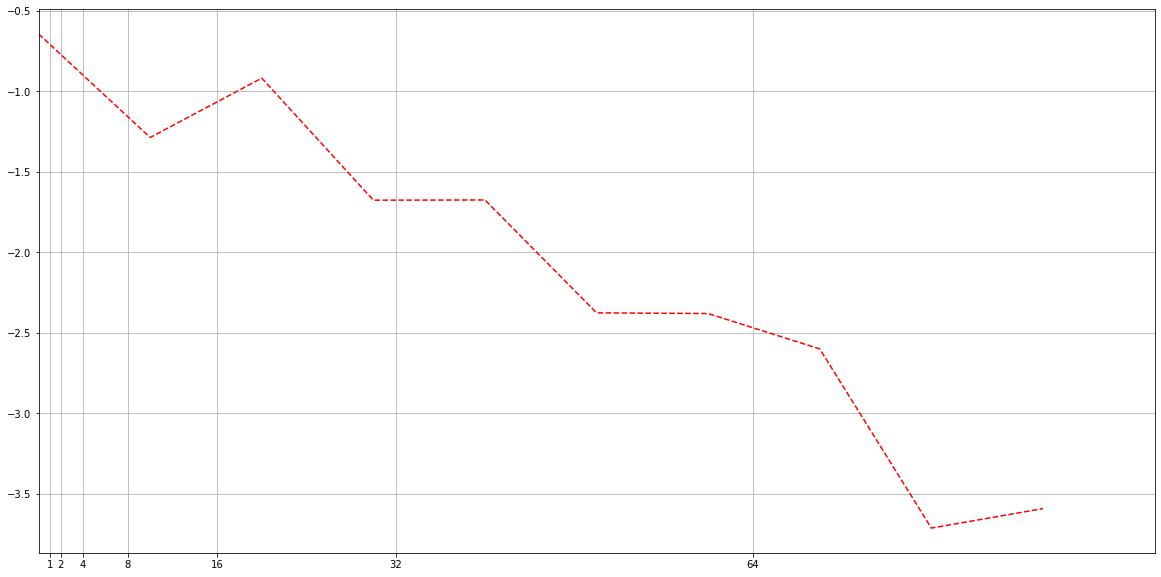

In [22]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(kind='line', logy=False, xticks=[1, 2, 4, 8, 16, 32, 64, 128], xlim=[0, 100], grid=True, style='r--')

plt.savefig(os.path.join(folder, 'wykres8.svg'), dpi=400, bbox_inches='tight')

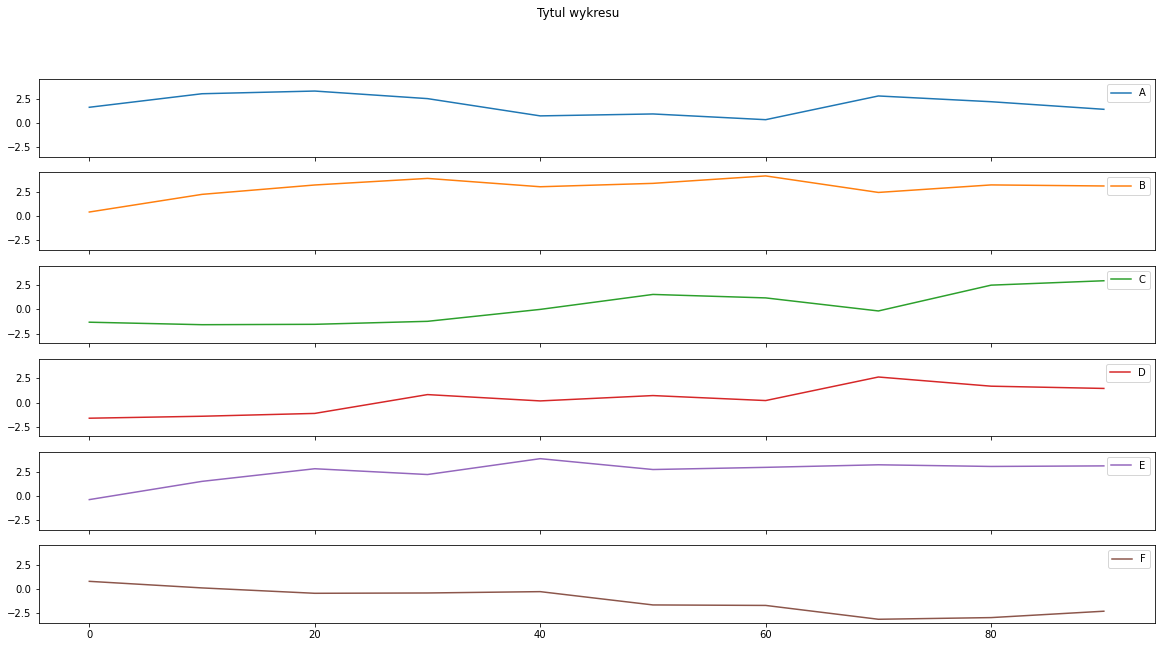

In [23]:
df = pd.DataFrame(np.random.randn(10, 6).cumsum(0), columns=['A', 'B', 'C', 'D', 'E', 'F'], index=np.arange(0, 100, 10))
df.plot(subplots=True, sharex=True, sharey=True, title='Tytul wykresu', sort_columns=True)

#df = num_data
#df.plot(subplots=True, sharex=True, sharey=True, title='Wykresy wartości liczbowych', sort_columns=True)

plt.savefig(os.path.join(folder, 'wykres9.png'), dpi=400, bbox_inches='tight')

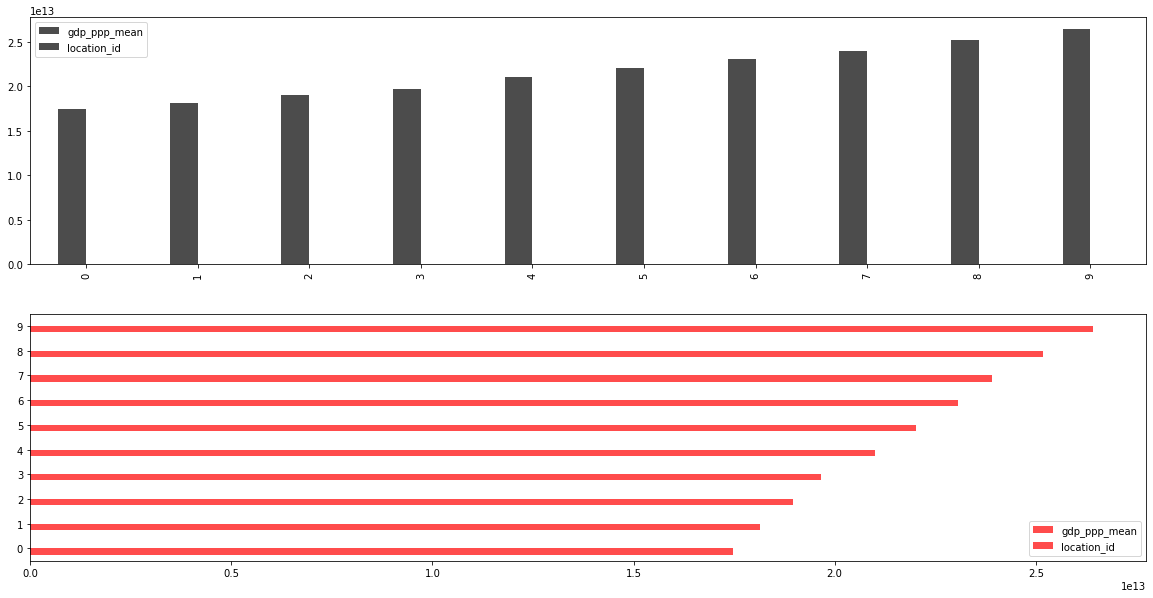

In [26]:
#data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data = pd.DataFrame(num_data[['location_id', 'gdp_ppp_mean']][:10], columns=['gdp_ppp_mean', 'location_id'])

fig, axes = plt.subplots(2, 1)

data.plot.bar(ax = axes[0], color='k', alpha=0.7)
data.plot.barh(ax = axes[1], color='r', alpha=0.7)

plt.savefig(os.path.join(folder, 'wykres10.png'), dpi=400, bbox_inches='tight')

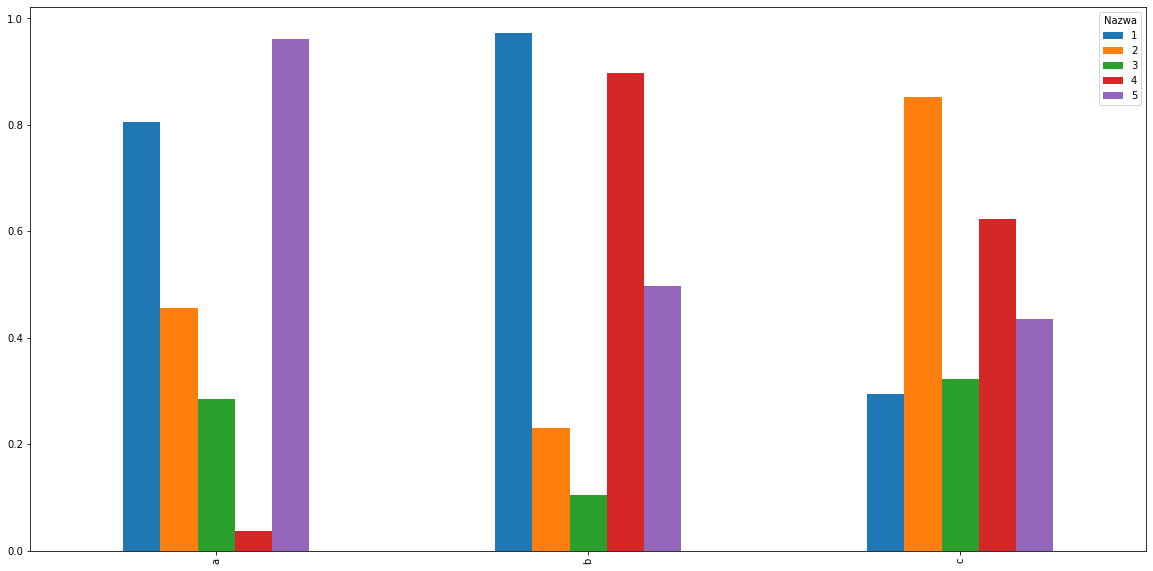

In [27]:
data = np.random.rand(3, 5)

df = pd.DataFrame(data, index=['a', 'b', 'c'], columns=pd.Index(['1', '2', '3', '4', '5'], name='Nazwa'))
df.plot.bar()

plt.savefig(os.path.join(folder, 'wykres11.png'), dpi=400, bbox_inches='tight')

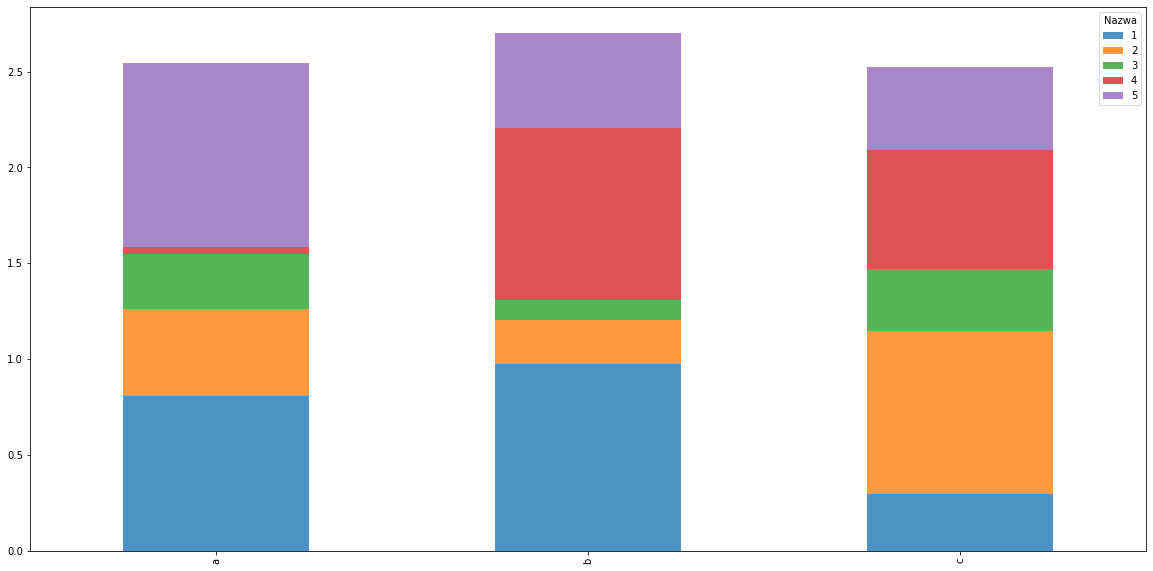

In [28]:
df.plot.bar(stacked=True, alpha=0.8)

plt.savefig(os.path.join(folder, 'wykres12.png'), dpi=400, bbox_inches='tight')

In [29]:
n = 1_000

total_bill = [x * 100 for x in np.random.rand(n)]
tip = [x * (np.random.rand(1)[0]/10) for x in total_bill]
sex = np.random.choice(['Female', 'Male'], n)
smoker = np.random.choice(['yes', 'no'], n, p=[0.3, 0.7])
day = np.random.choice(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], n)
size = np.random.choice([np.arange(1, 7)][0], n)

tips = pd.DataFrame(
    { 
        'total_bill': total_bill, 
        'tip': tip, 
        'sex': sex, 
        'smoke': smoker,
        'day': day,
        'size': size
    })

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,34,29,14,30,32,17
Mon,31,23,31,18,18,23
Sat,21,27,21,21,29,26
Sun,17,20,14,29,19,30
Thu,23,22,17,21,29,26
Tue,28,23,24,24,21,23
Wed,21,36,22,20,22,24


In [30]:
# normalizacja wartości

party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.217949,0.185897,0.089744,0.192308,0.205128,0.108974
Mon,0.215278,0.159722,0.215278,0.125000,0.125000,0.159722
Sat,0.144828,0.186207,0.144828,0.144828,0.200000,0.179310
Sun,0.131783,0.155039,0.108527,0.224806,0.147287,0.232558
Thu,0.166667,0.159420,0.123188,0.152174,0.210145,0.188406
Tue,0.195804,0.160839,0.167832,0.167832,0.146853,0.160839
Wed,0.144828,0.248276,0.151724,0.137931,0.151724,0.165517


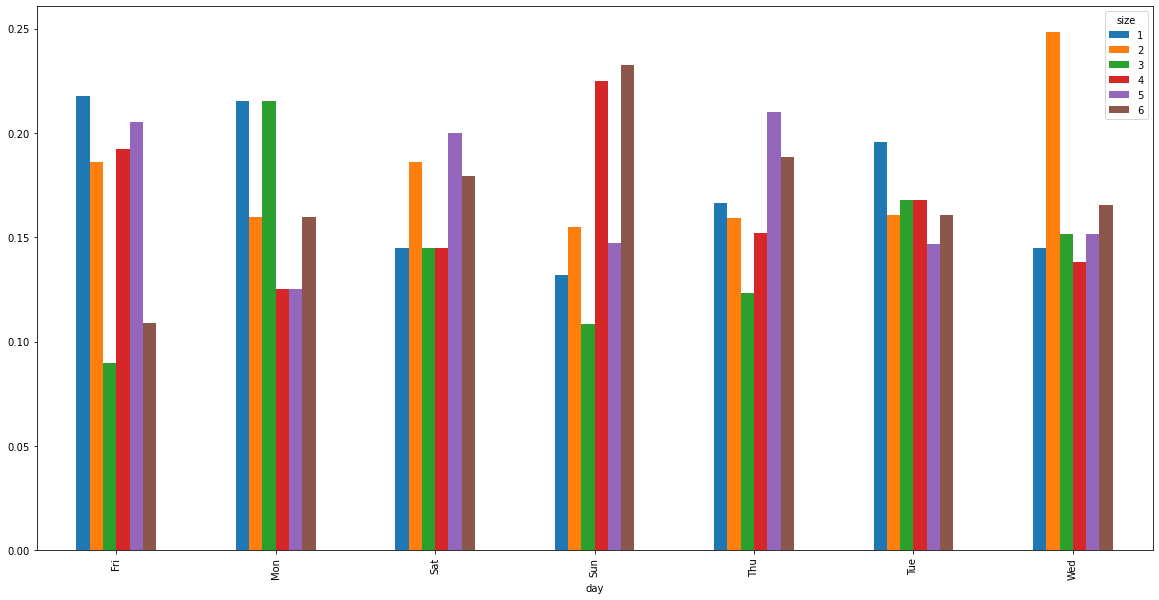

In [31]:
party_pcts.plot.bar()

plt.savefig(os.path.join(folder, 'wykres13.svg'), dpi=400, bbox_inches='tight')

In [34]:
import seaborn as sns

In [35]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips

,total_bill,tip,sex,smoke,day,size,tip_pct
0,45.781751,3.838765,Male,no,Sat,6,0.091523
1,51.078706,3.965251,Female,no,Fri,3,0.084164
2,48.594290,1.654526,Male,no,Fri,1,0.035248
3,1.403930,0.032478,Female,no,Sun,6,0.023682
4,66.907904,6.056263,Female,no,Tue,3,0.099525
...,...,...,...,...,...,...,...
995,10.094440,0.028775,Female,no,Sat,1,0.002859
996,54.311441,5.370252,Male,no,Wed,2,0.109729
997,51.539358,4.520549,Male,no,Tue,2,0.096143
998,77.860401,2.980742,Female,yes,Mon,3,0.039807


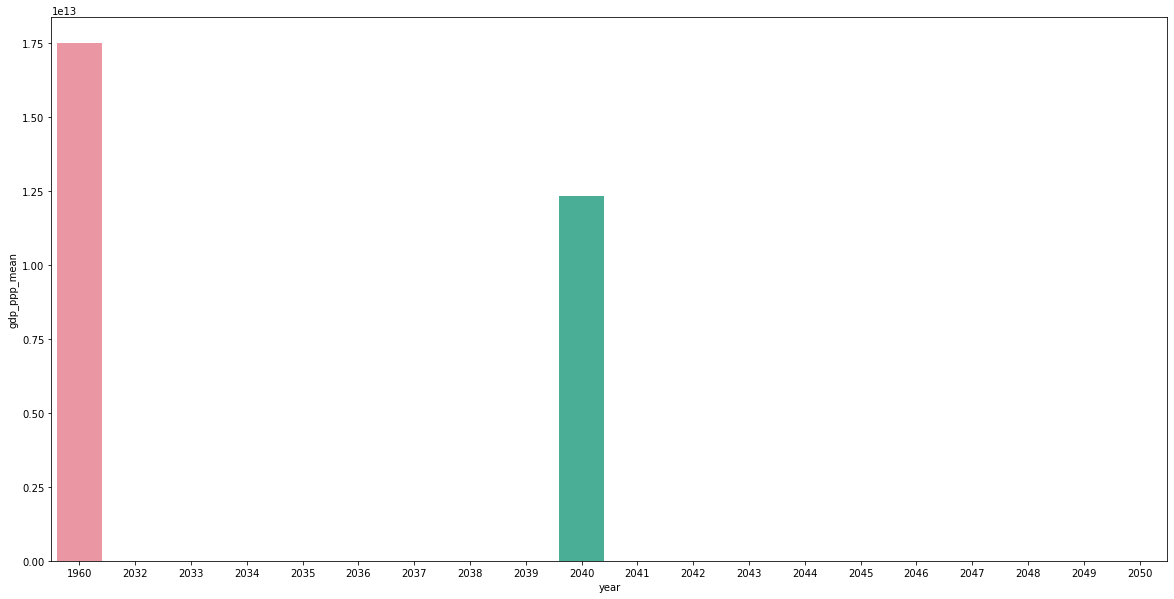

In [37]:
#sns.barplot(x='tip_pct', y='day', data=tips, orient='h', hue='sex')
import seaborn as sns

max = 100_000
per = 1_000
sns.barplot(y=num_data.gdp_ppp_mean[:max:per], x = num_data.year[:max:per])

plt.savefig(os.path.join(folder, 'wykres14.png'), dpi=400, bbox_inches='tight')

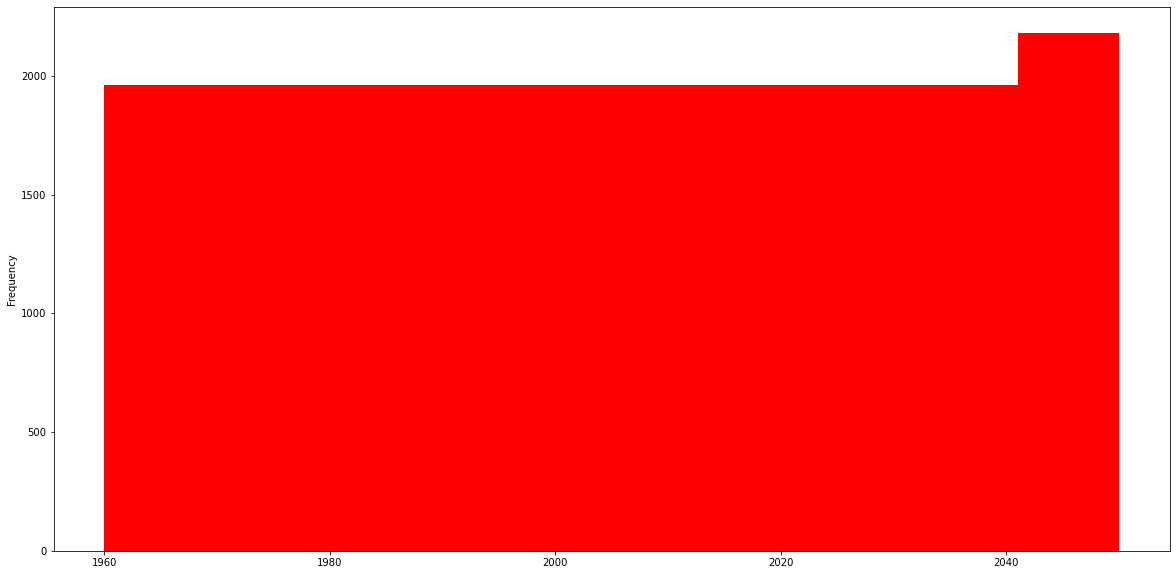

In [38]:
# histogram
#tips['tip_pct'].plot.hist(bins=50)
num_data['year'].plot.hist(bins=10, color='red')

plt.savefig(os.path.join(folder, 'wykres15.png'), dpi=400, bbox_inches='tight')

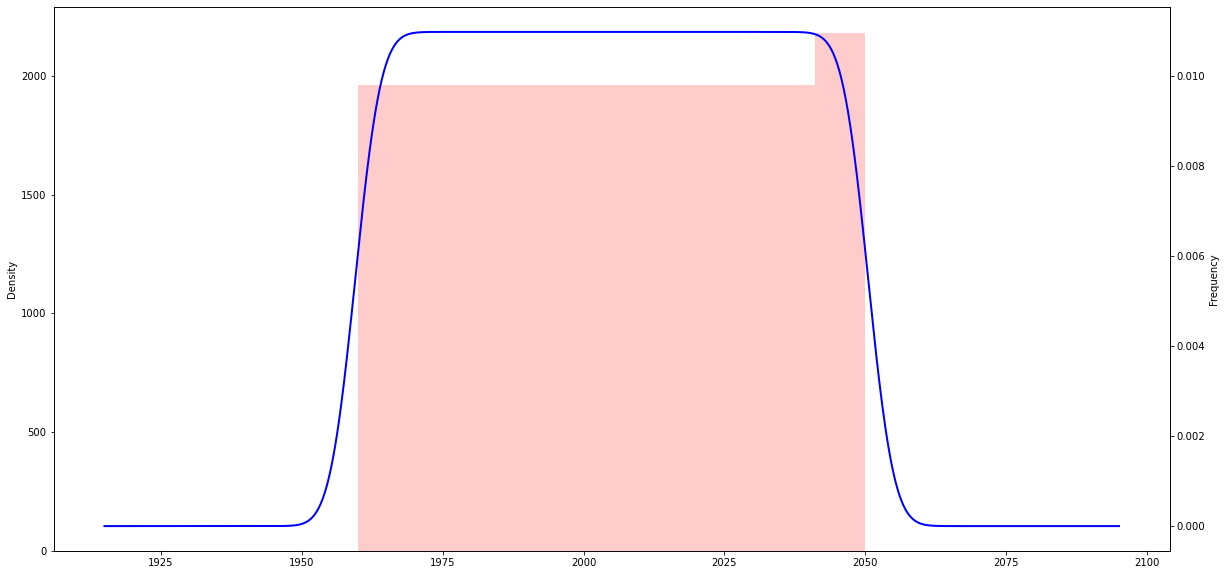

In [39]:
# wykres gęstości

#tips['tip_pct'].plot.kde()
num_data['year'].plot.hist(bins=10, color='red', alpha=0.2)
ax = num_data['year'].plot.kde(color='blue', linewidth=2.0, secondary_y=True)
ax.set_ylabel("Frequency", fontsize=10)

plt.savefig(os.path.join(folder, 'wykres16.png'), dpi=400, bbox_inches='tight')

C:\Users\Dzikus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


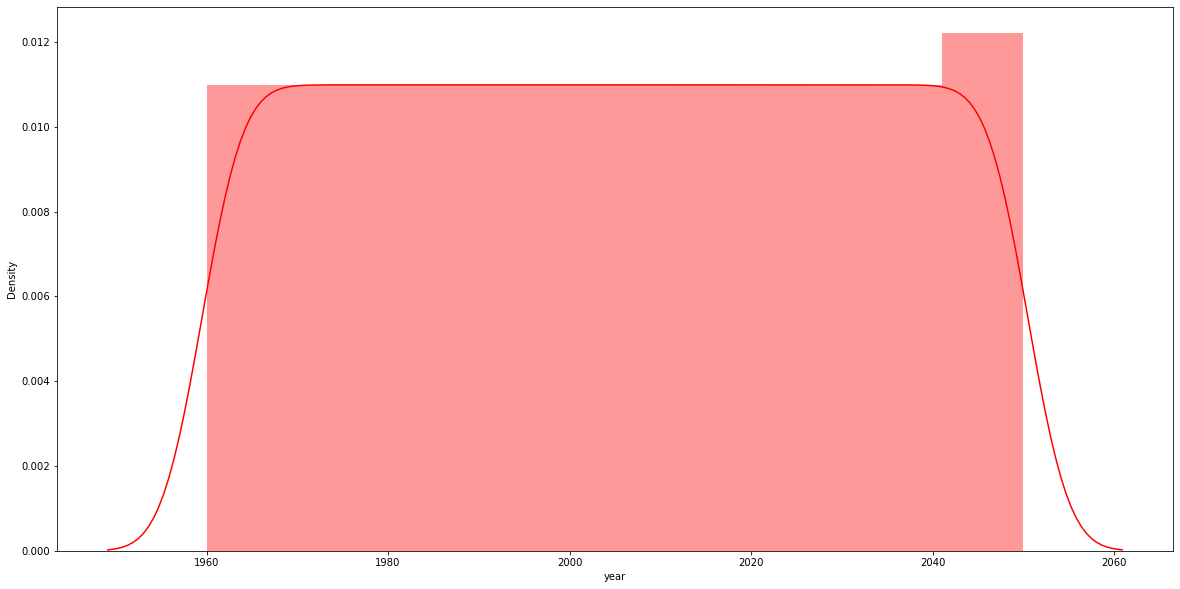

In [40]:
# histogram i wykres gęstości na jednym wykresie
#comp1 = np.random.normal(0, 1, size=200)
#comp2 = np.random.normal(10, 2, size=200)

#vals = pd.Series(np.concatenate([comp1, comp2]))

#sns.distplot(vals, bins=100, color='r')
sns.distplot(num_data['year'], bins=10, color='r')

plt.savefig(os.path.join(folder, 'wykres17.png'), dpi=400, bbox_inches='tight')

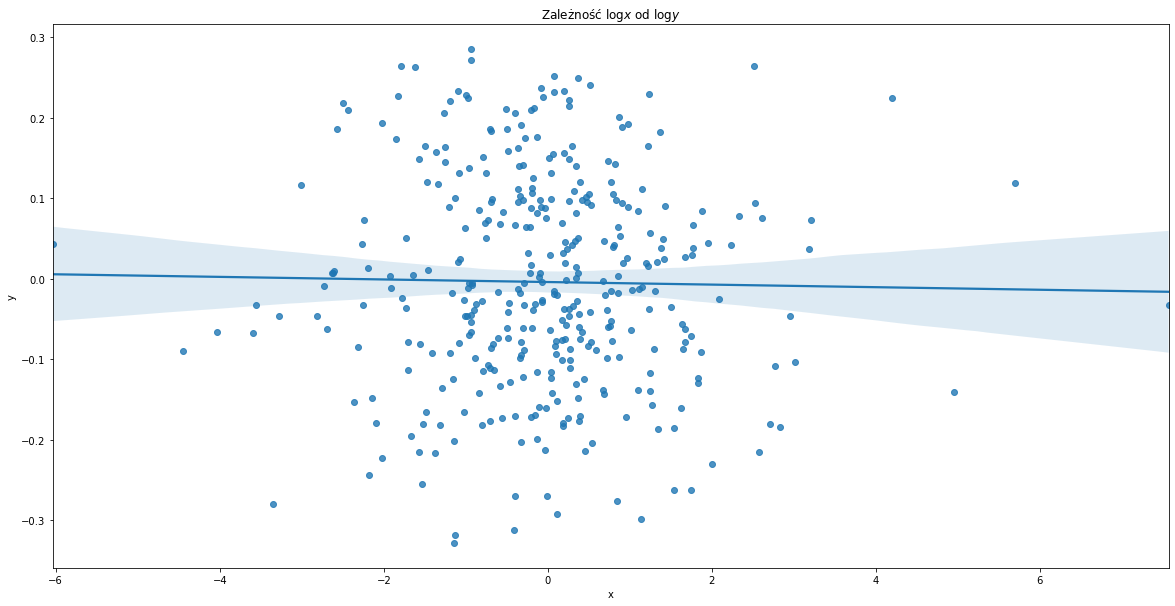

In [41]:
# wykres regresji liniowej

# losowe dane
n = 1_000
data = pd.DataFrame({
    'x': np.random.rand(n)*5-2,
    'y': np.random.rand(n)*2+5, 
    'z': np.random.rand(n)
})
# różnica logarytmów
data = np.log(data).diff()

sns.regplot(x='x', y='y', data=data)
plt.title('Zależność $\log{x}$ od $\log{y}$')

#sns.regplot(x='elim_ch', y='prelim_est', data=num_data)
#plt.title('Zależność $\log$ {} od $\log$ {}'.format('m1', 'unemp'))

plt.savefig(os.path.join(folder, 'wykres18.png'), dpi=400, bbox_inches='tight')

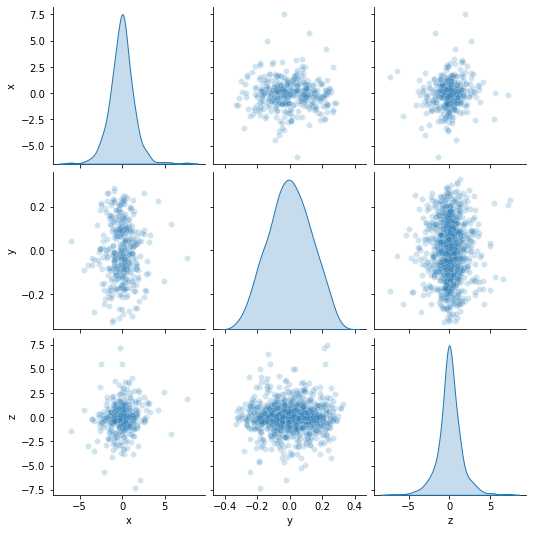

In [42]:
# wszystkie wykresy rozrzutu

#sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.2})

plt.savefig(os.path.join(folder, 'wykres19.png'), dpi=400, bbox_inches='tight')

In [49]:
# kilka wykresów słupkowych obok siebie (tzw. faset)

path = r"E:\studiaMGR\SEMESTR III\EiWD\2\IHME_GDP_1960_2050_CSV_1\IHME_GDP_1960_2050_Y2021M09D22.CSV"

data = pd.read_csv(path, low_memory=False)


print(data.level.drop_duplicates())
print(data[data['location_name'] == 1].level.drop_duplicates())
print(data[data['location_name'] == 1].year.drop_duplicates()) 

print(data.year.drop_duplicates())
print(data[data['location_name'] == 0].level.drop_duplicates()) 
print(data[data['location_name'] == 0].year.drop_duplicates())

0                         Global
91              GBD Super Region
182                      Country
19474    World Bank Income Group
Name: level, dtype: object
Series([], Name: level, dtype: object)
Series([], Name: year, dtype: int64)
0     1960
1     1961
2     1962
3     1963
4     1964
      ... 
86    2046
87    2047
88    2048
89    2049
90    2050
Name: year, Length: 91, dtype: int64
Series([], Name: level, dtype: object)
Series([], Name: year, dtype: int64)


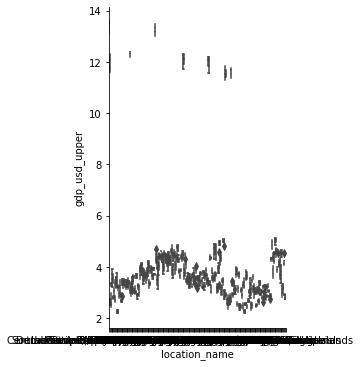

In [59]:
# wykresy pudełkowe

import math

data['gdp_usd_upper'] = data.gdp_usd_upper.apply(lambda x: 0 if x=='-' else math.log(abs(int(x)+1),10))

sns.catplot(x='location_name', y='gdp_usd_upper', kind='box', data=data)
